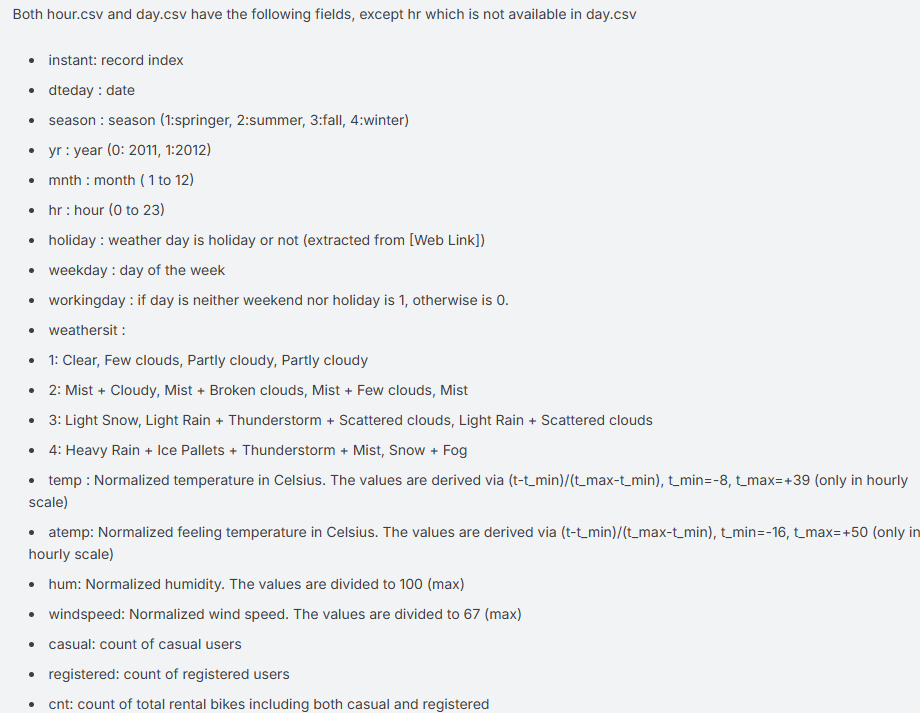

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [17]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)

In [18]:
cat_col

['dteday']

In [19]:
num_col

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### from the data card

     column "instant" seems to be a unique identifier of the data and so this can be dropped.
     It's obvious that the target column "cnt" has the sum of "casual" and "registered" that supports data leak.
     Column "dteday" can be removed since similar information is decoded into "yr", "mnth" and "weekday"

In [22]:
df.drop(columns=['instant','casual','registered','dteday'],inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [23]:
# Based on understanding from data dictionary renaming the relevant columns
df.rename(columns={'yr':'year', 'mnth':'month', 'temp':'temperature', 'hum':'humidity', 'cnt':'count'}, inplace=True)
df

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


 # Mapping the data as per data card

In [24]:
# mapping the season column
df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

# mapping the month column
df.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',
                    8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace=True)

# Mapping weekday
df.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)

# Mapping weathersit
df.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snow',4:'Heavy_snow'}, inplace = True)

# Mapping year
df.year.replace({0: 2011, 1:2012}, inplace = True)

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,2011,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2011,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2011,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2011,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2011,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# number of unique values
for i in df.columns:
    print(i,df[i].nunique())

season 4
year 2
month 12
holiday 2
weekday 7
workingday 2
weathersit 3
temperature 498
atemp 689
humidity 594
windspeed 649
count 695


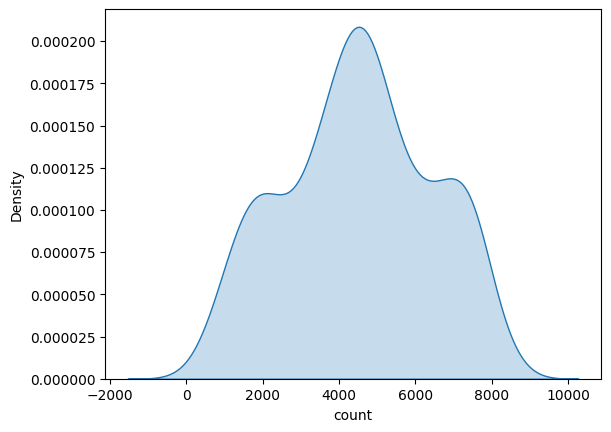

In [26]:
# Analyze our target
sns.kdeplot(df['count'],fill='blue')
plt.show()

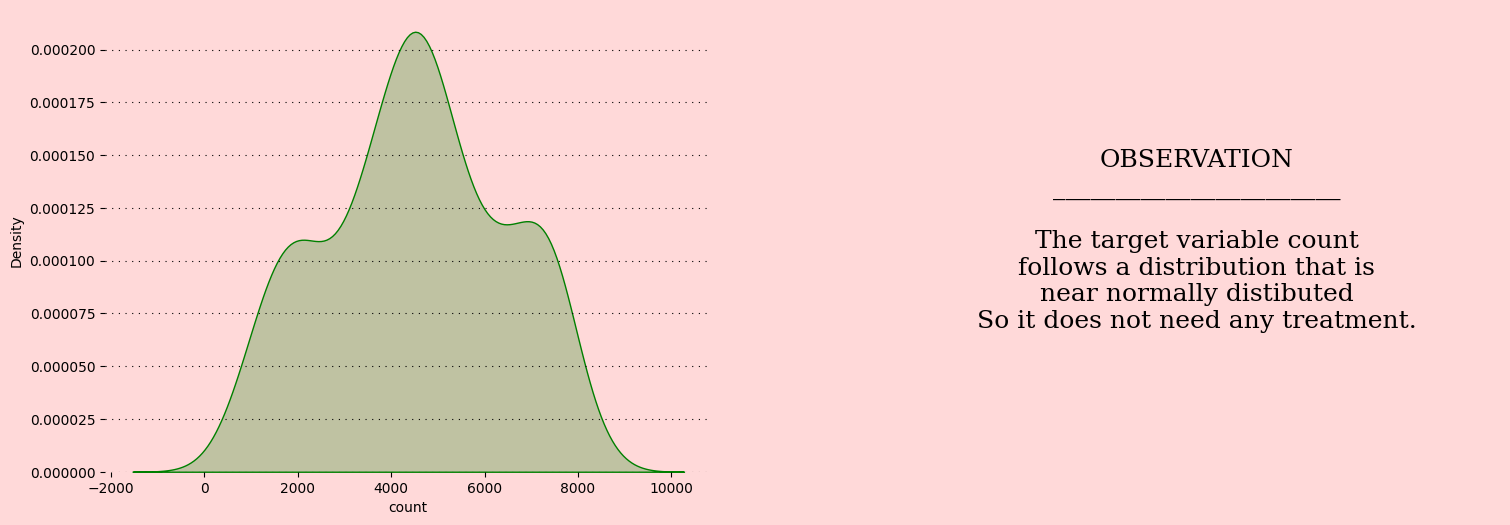

In [27]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)                    # Adds grids like boxes 1 row 2 columns
spec.update(wspace=0.3, hspace=0.3)             # Spacing b/w grids
sec_1 = plt.subplot(spec[0,0])               
sec_2 = plt.subplot(spec[0,1])

bg_color = '#ffd9d9'                            # Background color
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

sns.kdeplot(df['count'], fill=True, color='g', ax=sec_1)              # what plot u want at which sec or location
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))  # adding lines in graph

sec_2.text(0.5,0.5,f'OBSERVATION\n_______________________\n\n\
The target variable count\nfollows a distribution that is\nnear normally distibuted\n\
So it does not need any treatment.',
ha='center',va='center',size=18, family='serif')

sec_2.xaxis.set_visible(False)                        # removing x and y axis in text grid
sec_2.yaxis.set_visible(False)

for location in ['bottom', 'top', 'right', 'left']:                      
    for selection in [sec_1, sec_2]:
        if selection == 'sec_1' and location == 'bottom': # Removing all axes except x axis in sec 1
            continue
        else:
            selection.spines[location].set_visible(False)

plt.show()

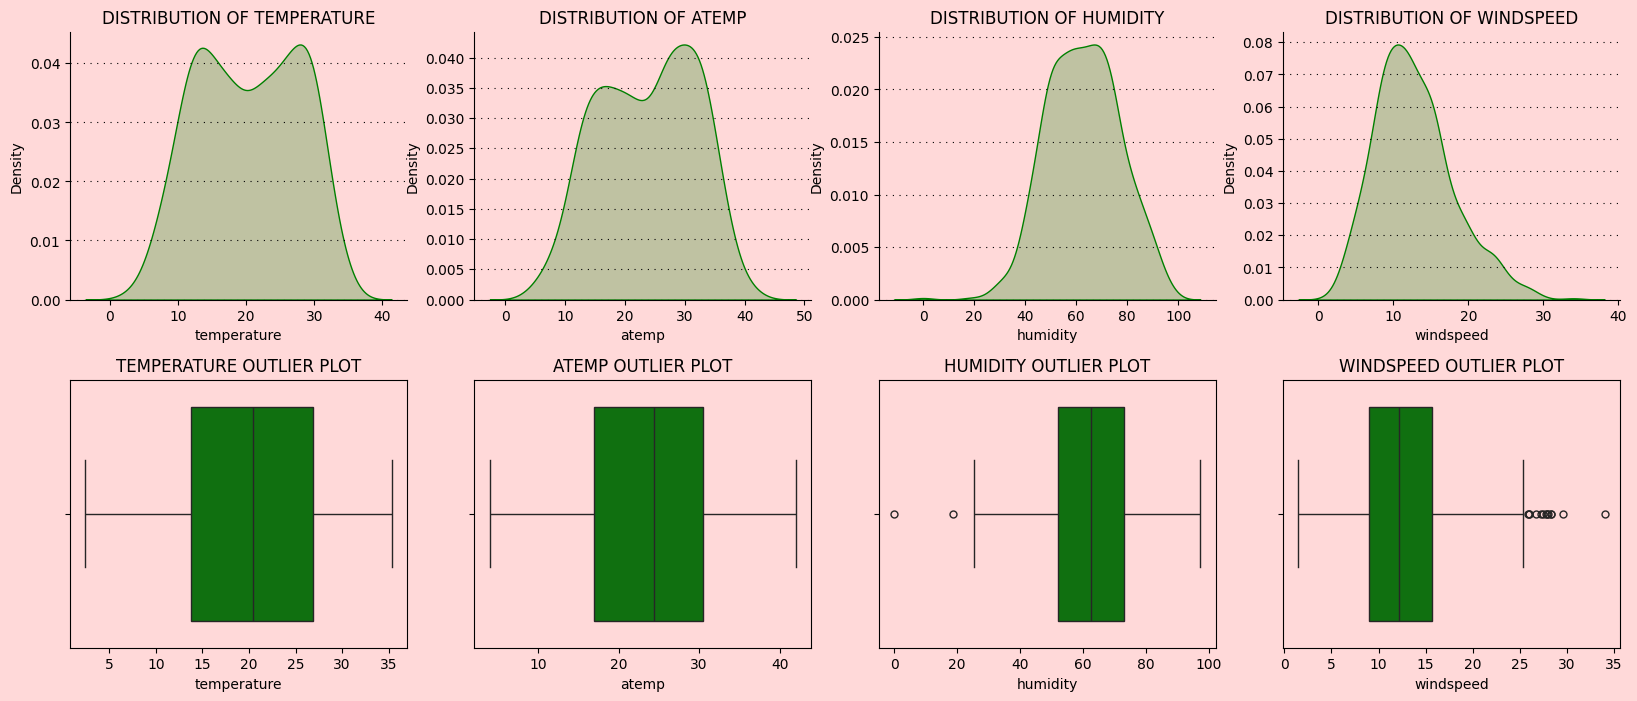

In [28]:
# Creating subplots
fig = plt.figure(figsize=(20,8))
spec = fig.add_gridspec(2,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08]:
    selection.set_facecolor(bg_color)

# Plotting the graph
dist_sec = [sec_01, sec_02, sec_03, sec_04]
box_sec = [sec_05, sec_06, sec_07, sec_08]
cnt = 0
for feature in df.columns:
    if df[feature].nunique() > 100 and feature != 'count':
        sns.kdeplot(df[feature], ax=dist_sec[cnt], fill='True', color='g')
        dist_sec[cnt].set_title('DISTRIBUTION OF '+ feature.upper())
        dist_sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sns.boxplot(df[feature], ax=box_sec[cnt], orient='h', color='green', fliersize=5)
        box_sec[cnt].set_title(feature.upper() + ' OUTLIER PLOT')
        cnt+=1

for location in ['top', 'right']:
    for selection in [sec_01, sec_02, sec_03, sec_04]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)


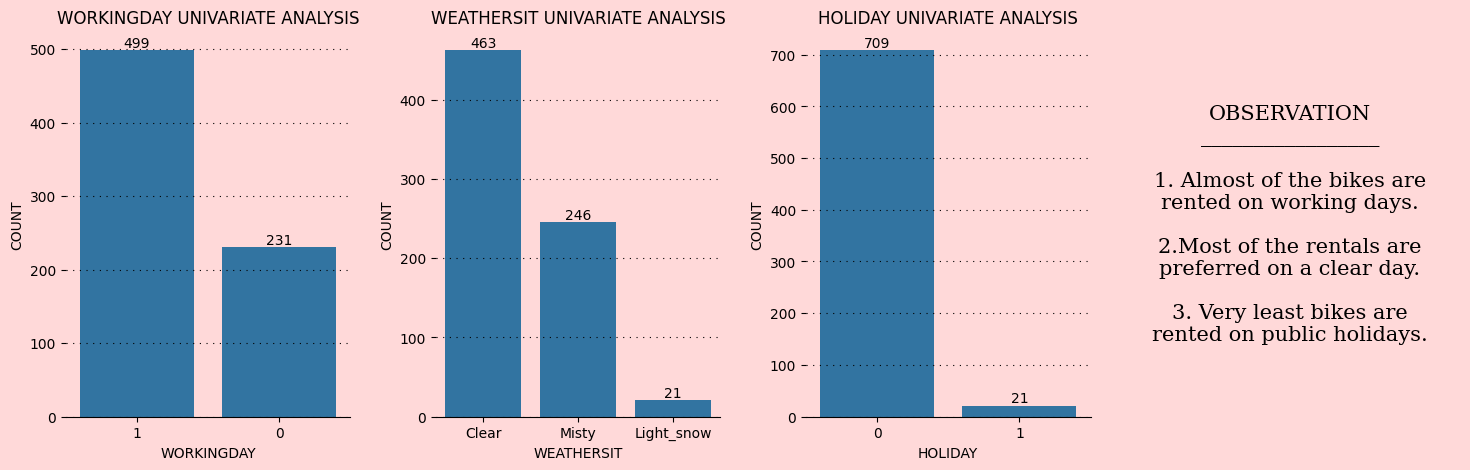

In [29]:
fig = plt.figure(figsize=(18,5))
spec = fig.add_gridspec(1,4)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[0,2])
sec_4 = plt.subplot(spec[0,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

feats = ['workingday', 'weathersit', 'holiday']
sec = [sec_1, sec_2, sec_3]
cnt=0
for feature in feats:
        axs = sns.countplot(x=df[feature], ax=sec[cnt], order=df[feature].value_counts().index)
        axs.bar_label(axs.containers[0])
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sec[cnt].set_title(feature.upper()+' UNIVARIATE ANALYSIS')
        sec[cnt].set_xlabel(feature.upper())
        sec[cnt].set_ylabel('COUNT')
        cnt+=1

sec_4.text(0.4,0.5,'OBSERVATION\n_________________\n\n\
1. Almost of the bikes are\nrented on working days.\n\n2.Most of the rentals are\n\
preferred on a clear day.\n\n3. Very least bikes are\n\
rented on public holidays.',ha='center',va='center',
size=15, family='serif')

# Removing axes and spines
for location in ['top', 'right', 'left', 'bottom']:
        sec_4.spines[location].set_visible(False)
        sec_4.xaxis.set_visible(False)
        sec_4.yaxis.set_visible(False)

for section in sec:
    for location in ['top', 'right', 'left']:
            section.spines[location].set_visible(False)

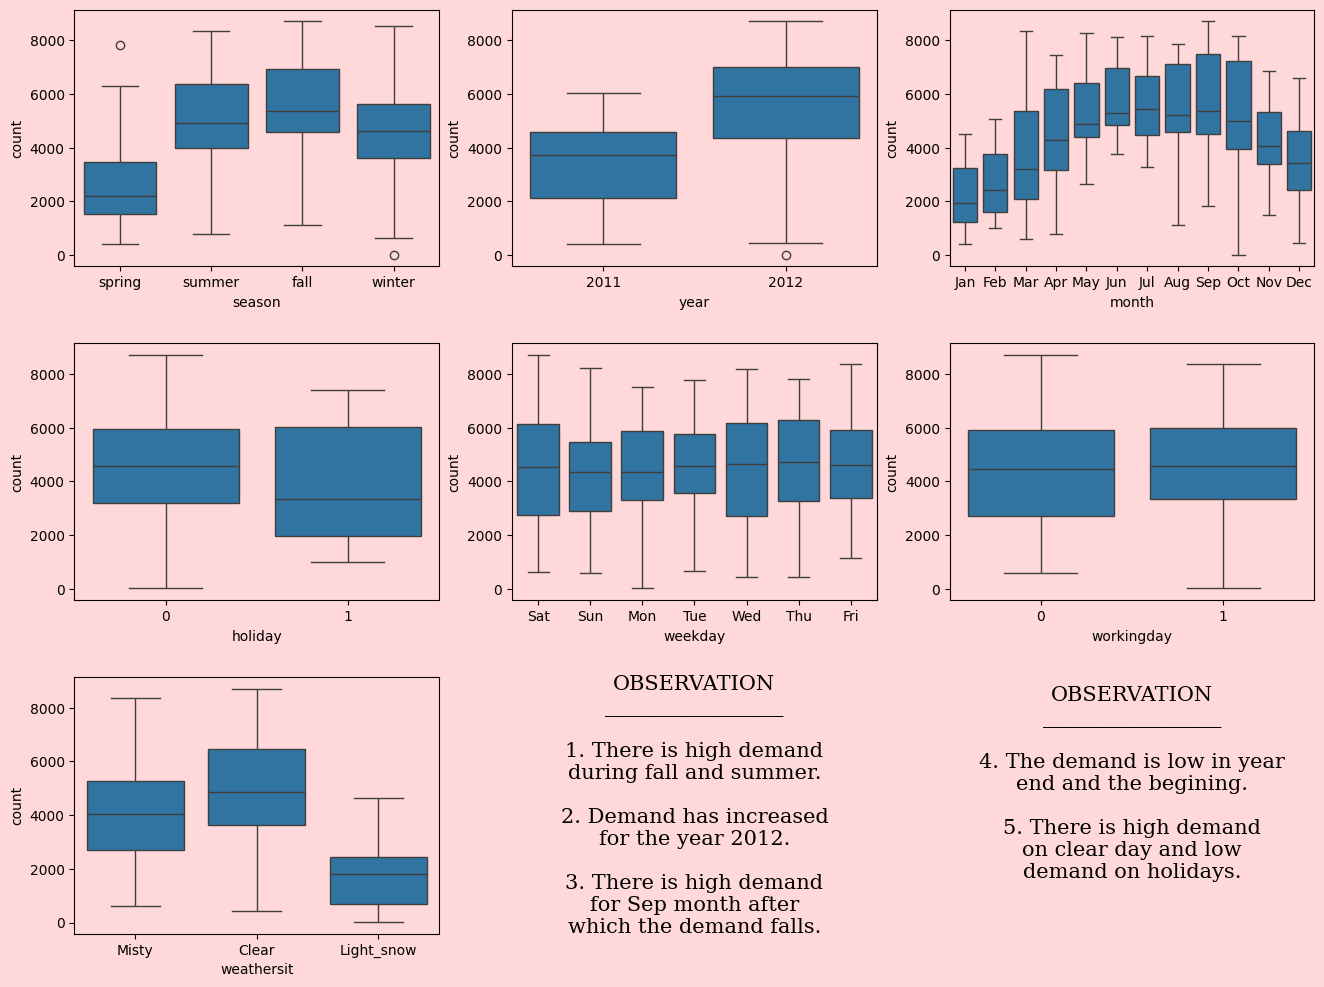

In [30]:
fig = plt.figure(figsize=(16,12))
spec = fig.add_gridspec(3,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04,
                  sec_05, sec_06, sec_07, sec_08, sec_09]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]
cnt = 0
for feature in df.columns:
    if df[feature].nunique() < 20:
        sns.boxplot(x=df[feature], y=df['count'], ax=sec[cnt])
        cnt+=1


# Narrating the observations
sec_08.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
1. There is high demand\nduring fall and summer.\n\n2. Demand has increased\nfor the year 2012.\
\n\n3. There is high demand\nfor Sep month after\nwhich the demand falls.',ha='center',va='center',
size=15, family='serif')

sec_09.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
4. The demand is low in year\nend and the begining.\n\n5. There is high demand\n\
on clear day and low\ndemand on holidays.\n\n',ha='center',va='center',
size=15, family='serif')

for section in [sec_08, sec_09]:
    for location in ['top', 'right', 'left', 'bottom']:
            section.spines[location].set_visible(False)
            section.xaxis.set_visible(False)
            section.yaxis.set_visible(False)

### Continous Variable

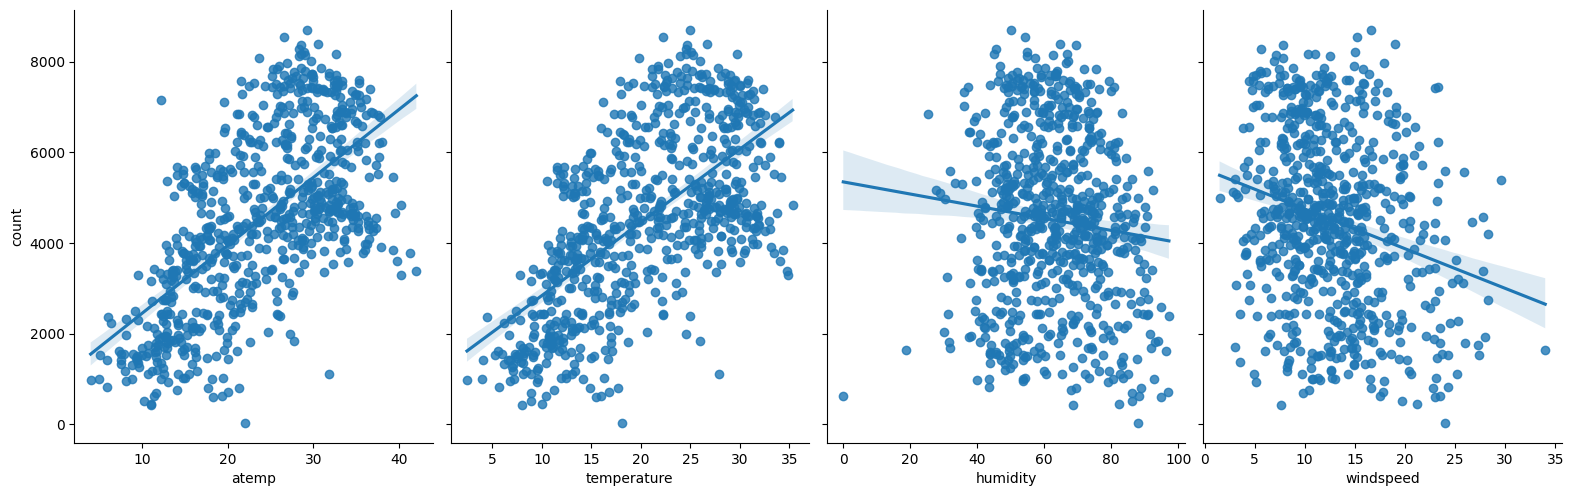

In [31]:
sns.pairplot(df, x_vars= ['atemp', 'temperature', 'humidity', 'windspeed'],
             y_vars= ['count'], kind='reg', diag_kind='auto', height=5, aspect=0.8)
plt.show()

### INFERENCE:
- Demand of the rentals high postive correlation with the temperature and atemp.
- Eventhough humidity is scattered around it has little negative correlation with rentals.
- Eventhough windspeed is scattered elsewhere, demand of rental decreases with increase in windspeed.

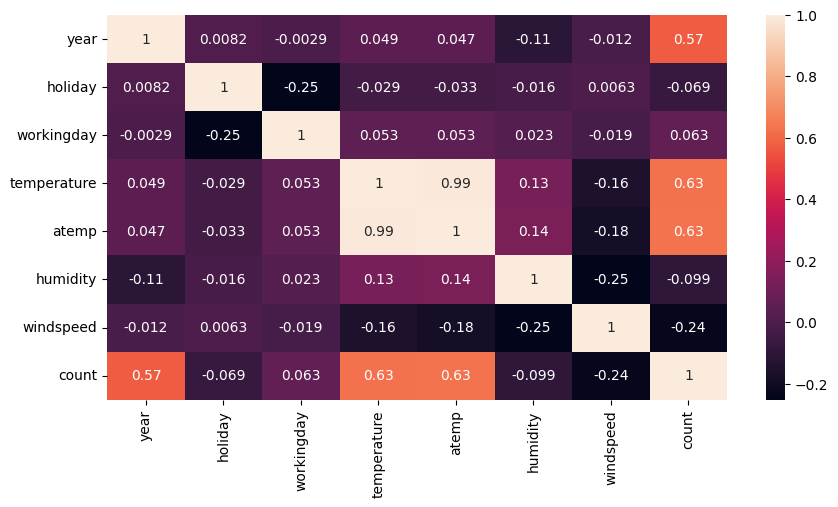

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#### INFERENCE
- count has good positive correlation with atemp and temperature.
- count has negative correlation with windspeed and humidity.
- Temperature and atemp has high correlation, means multicolinearity and has to be taken care.

In [33]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,2011,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2011,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2011,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2011,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2011,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2012,Dec,0,Thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2012,Dec,0,Fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2012,Dec,0,Sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2012,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


# One Hot Encoding

In [34]:
data = pd.get_dummies(data=df,
                     columns=['season', 'month', 'weekday', 'weathersit', 'year'],
                     drop_first=True, dtype='int')

In [35]:
data

,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_snow,weathersit_Misty,year_2012
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,1,0,0,0,1,1
726,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,1,1
727,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,...,0,0,1,0,0,0,0,0,1,1
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
from sklearn.model_selection import train_test_split
y =  data.pop('count')
x = data

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

# feature scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
cnt_feats = ['temperature', 'atemp', 'humidity', 'windspeed']
scaler = MinMaxScaler()
x_train[cnt_feats] = scaler.fit_transform(x_train[cnt_feats])

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# RFE

In [39]:
# Eliminating 50% of feature by rfe approach
from sklearn.feature_selection import RFE
rfe = RFE(lin_reg,n_features_to_select=14)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [40]:
features_df=pd.DataFrame(rfe.ranking_,index=x_train.columns,columns=['Rank'])
features_df["Support"]=rfe.support_
features_df

,Rank,Support
holiday,1,True
workingday,1,True
temperature,4,False
atemp,1,True
humidity,1,True
windspeed,1,True
season_spring,1,True
season_summer,9,False
season_winter,1,True
month_Aug,12,False


In [41]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Function for building statsmodel
def model(feats):
    x_train_stat = sm.add_constant(x_train[feats])
    lin_reg = sm.OLS(y_train, x_train_stat).fit()
    print(lin_reg.summary())
    return lin_reg

# Function to compute VIFs
def vif_mod(feat):
    data1 = x_train[feat]
    vif = pd.DataFrame()
    vif['Columns'] = data1.columns
    vif['VIF'] = [variance_inflation_factor(data1.values, i) for i in range(data1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [42]:
# variable based on RFE
sup_cols = x_train.columns[rfe.support_]

# x_train data frame with selected cols
x_train_rfe =  x_train[sup_cols]
x_train_rfe.columns

Index(['holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_Jul', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light_snow', 'year_2012'],
      dtype='object')

In [43]:
feats = list(x_train_rfe.columns)

model(feats)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.7
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.34e-181
Time:                        01:51:21   Log-Likelihood:                -4141.0
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     497   BIC:                             8369.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2736.40